In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from typing import List, Dict, Optional, Union
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

In [27]:
# Path to your data folder
data_folder = '../yfinance_data'

# List to hold DataFrames
data_frames = {}

# Read each historical data file
for file in os.listdir(data_folder):
    if file.endswith('_historical_data.csv'):
        ticker = file.split('_')[0]  # Extract ticker symbol
        file_path = os.path.join(data_folder, file)
        data_frames[ticker] = pd.read_csv(file_path)

# Read raw analyst ratings
analyst_ratings = pd.read_csv(os.path.join(data_folder, 'raw_analyst_ratings.csv'))

# Display the first few rows of each DataFrame
for ticker, df in data_frames.items():
    print(f"{ticker} Data:")
    print(df.head(), "\n")

print("Analyst Ratings Data:")
print(analyst_ratings.head())

MSFT Data:
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059946  1031788800   
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.062087   308160000   
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063158   133171200   
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061552    67766400   
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060482    47894400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0   

NVDA Data:
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1  1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
2  1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
3

In [28]:
def clean_data(df):
    # Check for missing values
    print(f"Missing values in {df.columns}:\n{df.isnull().sum()}")

    # Drop rows with missing values (if needed)
    df.dropna(inplace=True)

    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Ensure numeric columns are in the correct format
    numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']  # Adjust as necessary
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop any rows that could not be converted to numeric
    df.dropna(inplace=True)

    return df

# Clean each DataFrame
for ticker, df in data_frames.items():
    data_frames[ticker] = clean_data(df)

Missing values in Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object'):
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Missing values in Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object'):
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Missing values in Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object'):
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Missing values in Index(['Date'

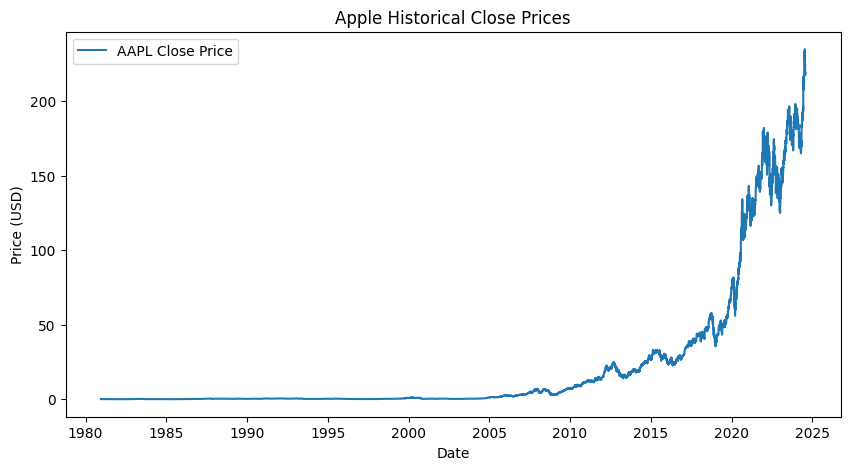

In [ ]:
import matplotlib.pyplot as plt
aapl_data = data_frames['AAPL']
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(aapl_data['Date']), aapl_data['Close'], label='AAPL Close Price')
plt.title('Apple Historical Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

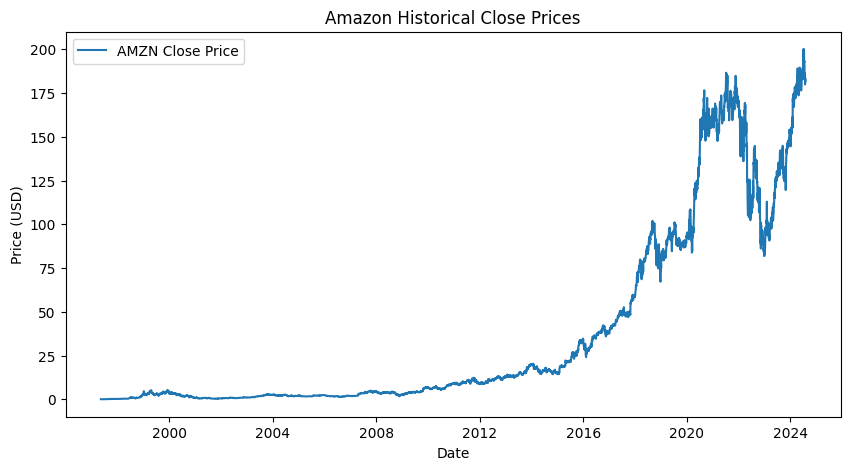

In [11]:
# Example: Plotting AMZN historical data
amzn_data = data_frames['AMZN']
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(amzn_data['Date']), amzn_data['Close'], label='AMZN Close Price')
plt.title('Amazon Historical Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

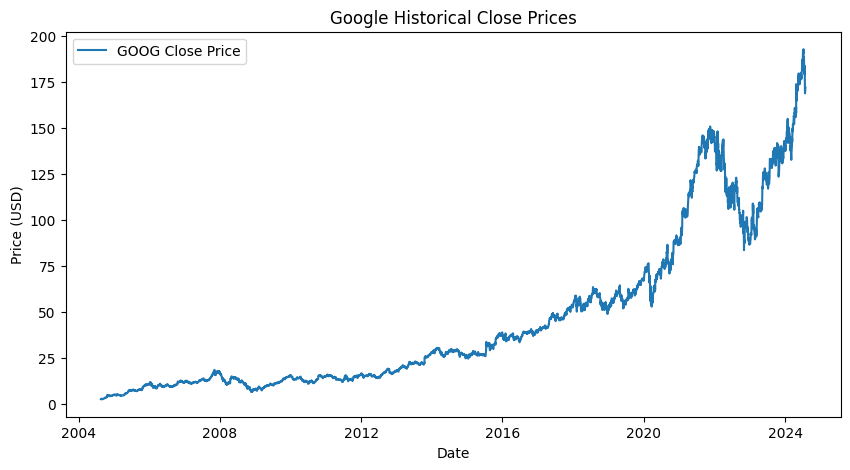

In [12]:
# Example: Plotting GOOg historical data
goog_data = data_frames['GOOG']
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(goog_data['Date']), goog_data['Close'], label='GOOG Close Price')
plt.title('Google Historical Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

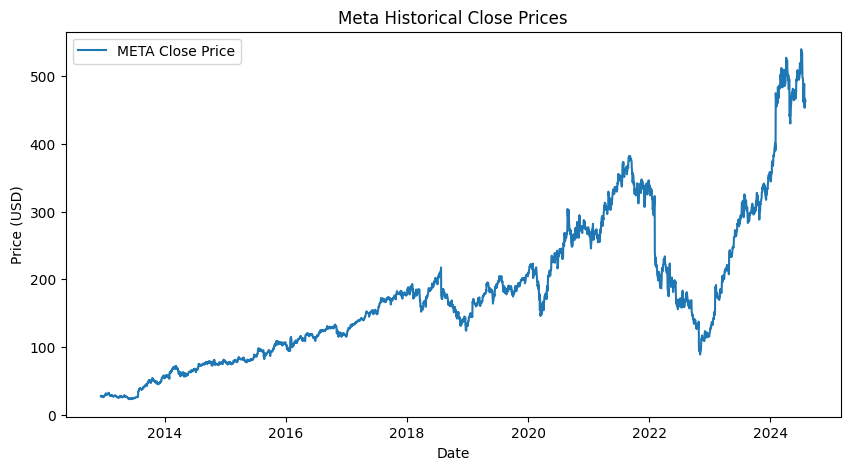

In [13]:
# Example: Plotting META historical data
meta_data = data_frames['META']
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(meta_data['Date']), meta_data['Close'], label='META Close Price')
plt.title('Meta Historical Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

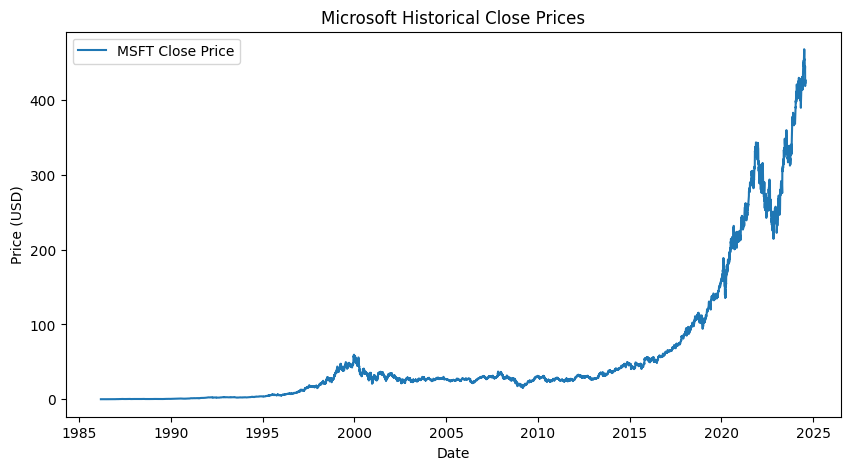

In [15]:
# Example: Plotting MSFT historical data
msft_data = data_frames['MSFT']
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(msft_data['Date']), msft_data['Close'], label='MSFT Close Price')
plt.title('Microsoft Historical Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

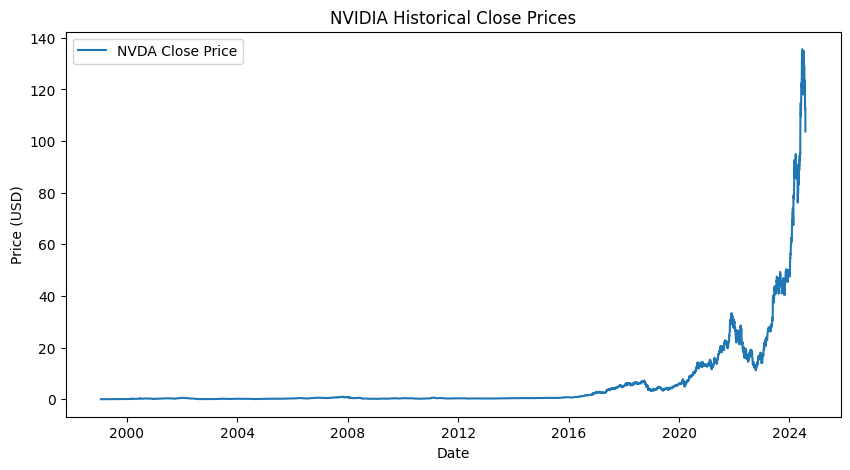

In [14]:
# Example: Plotting NVDA historical data
nvda_data = data_frames['NVDA']
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(nvda_data['Date']), nvda_data['Close'], label='NVDA Close Price')
plt.title('NVIDIA Historical Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

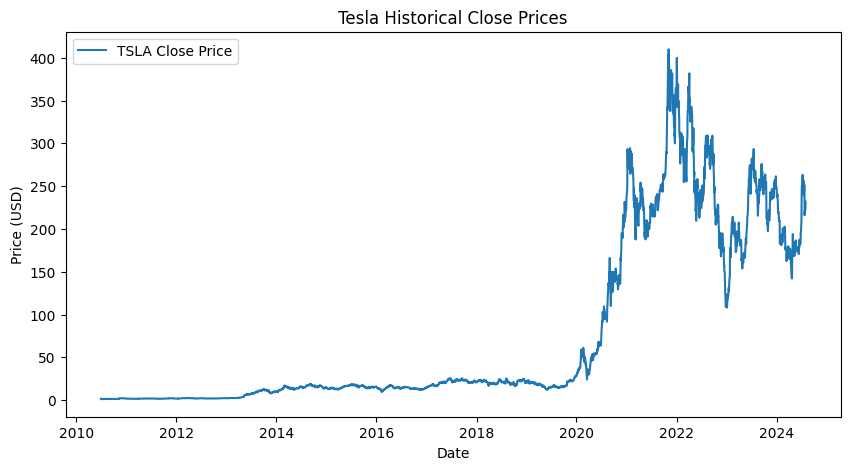

In [17]:
#Plotting tsla historical data
tsla_data = data_frames['TSLA']
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(tsla_data['Date']), tsla_data['Close'], label='TSLA Close Price')
plt.title('Tesla Historical Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

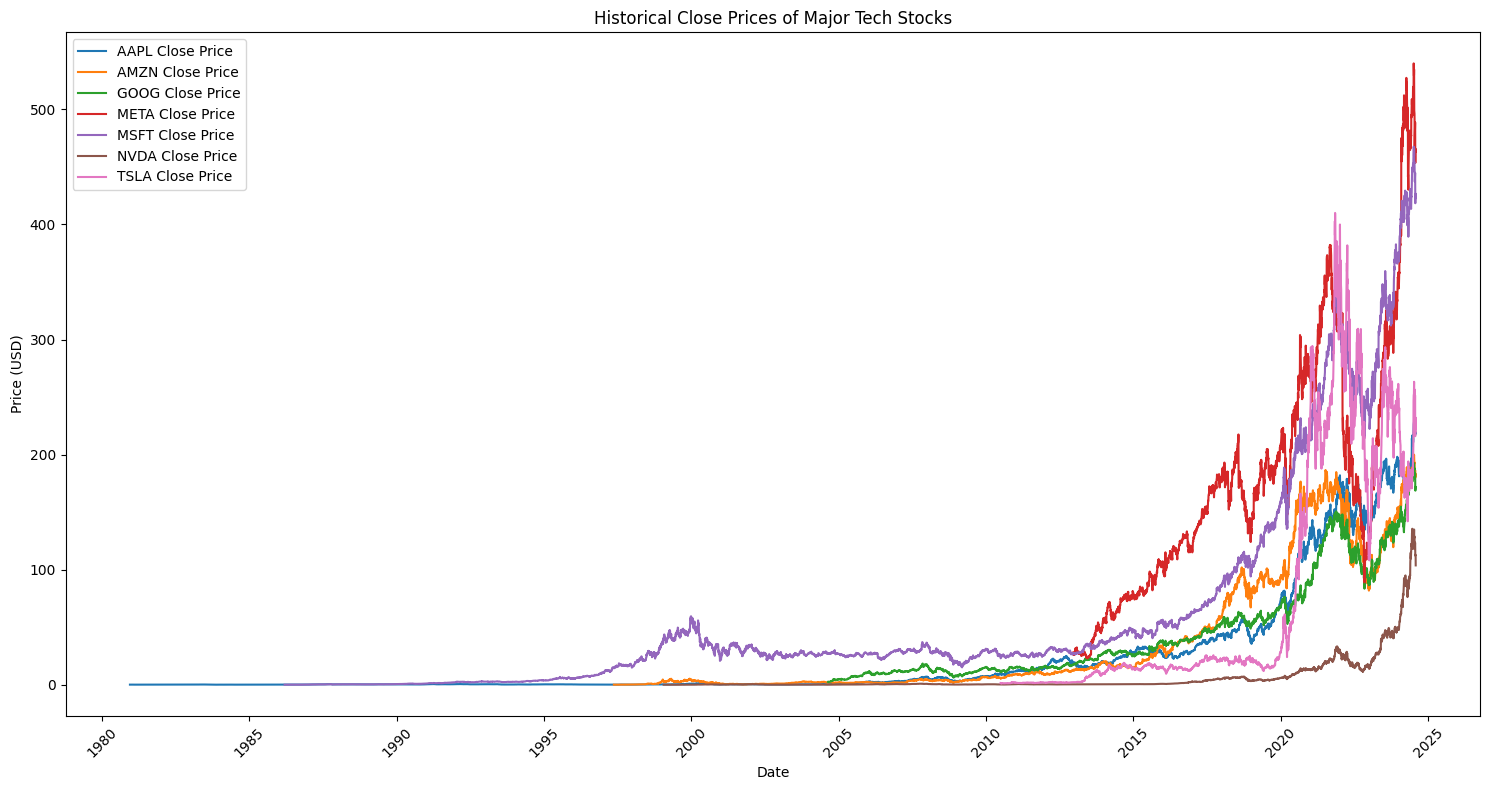

In [22]:
#Plotting AAPL, AMZN, GOOG, META, MSFT, NVDA and TSLA historical data ALL in one plot
plt.figure(figsize=(15, 8))
plt.plot(pd.to_datetime(aapl_data['Date']), aapl_data['Close'], label='AAPL Close Price')
plt.plot(pd.to_datetime(amzn_data['Date']), amzn_data['Close'], label='AMZN Close Price')
plt.plot(pd.to_datetime(goog_data['Date']), goog_data['Close'], label='GOOG Close Price')
plt.plot(pd.to_datetime(meta_data['Date']), meta_data['Close'], label='META Close Price')
plt.plot(pd.to_datetime(msft_data['Date']), msft_data['Close'], label='MSFT Close Price')
plt.plot(pd.to_datetime(nvda_data['Date']), nvda_data['Close'], label='NVDA Close Price')
plt.plot(pd.to_datetime(tsla_data['Date']), tsla_data['Close'], label='TSLA Close Price')
plt.title('Historical Close Prices of Major Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Display a summary of analyst ratings
print(analyst_ratings.describe())

         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06
